**References**


https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

*****

In [4]:
dir_path =r'C:\Users\Lenovo\Documents\cours_dataminig\newsgroups_data'
def get_files(dir_path, filename):
    return pd.read_csv(os.path.join(dir_path, filename), sep=';', header=None,engine='python')
songs_df= get_files(dir_path=dir_path, filename='songs_train.csv')
songs_df.columns=["id","artist.hotness","artist.id","artist.name","artist_mbtags","artist_mbtags_count","bars_confidence","bars_start","beats_confidence","beats_start","duration","end_of_fade_in","familiarity","key","key_confidence","latitude","location","longitude","loudness","mode","mode_confidence","release.id","release.name","similar","song.hotness","song.id","start_of_fade_out","tatums_confidence","tatums_start","tempo","terms","terms_freq","time_signature","time_signature_confidence","title","year"]
songs_df.shape

(3371, 36)

In [5]:
songs_df.columns

Index(['id', 'artist.hotness', 'artist.id', 'artist.name', 'artist_mbtags',
       'artist_mbtags_count', 'bars_confidence', 'bars_start',
       'beats_confidence', 'beats_start', 'duration', 'end_of_fade_in',
       'familiarity', 'key', 'key_confidence', 'latitude', 'location',
       'longitude', 'loudness', 'mode', 'mode_confidence', 'release.id',
       'release.name', 'similar', 'song.hotness', 'song.id',
       'start_of_fade_out', 'tatums_confidence', 'tatums_start', 'tempo',
       'terms', 'terms_freq', 'time_signature', 'time_signature_confidence',
       'title', 'year'],
      dtype='object')

In [6]:
# the first row

songs_df.iloc[1,:]

id                                                    7745
artist.hotness                                     0.56082
artist.id                               ARHRY5S1187B99B96F
artist.name                                       Static-X
artist_mbtags                             industrial metal
artist_mbtags_count                                      2
bars_confidence                                       0.32
bars_start                                         1.56041
beats_confidence                                         0
beats_start                                        0.55673
duration                                             189.1
end_of_fade_in                                           0
familiarity                                       0.768004
key                                                      5
key_confidence                                        0.47
latitude                                           32.6144
location                                           Alaba

In [7]:
# data type of each variable (column)

songs_df.dtypes

id                             int64
artist.hotness               float64
artist.id                     object
artist.name                   object
artist_mbtags                 object
artist_mbtags_count          float64
bars_confidence              float64
bars_start                   float64
beats_confidence             float64
beats_start                  float64
duration                     float64
end_of_fade_in               float64
familiarity                  float64
key                          float64
key_confidence               float64
latitude                     float64
location                      object
longitude                    float64
loudness                     float64
mode                           int64
mode_confidence              float64
release.id                     int64
release.name                  object
similar                       object
song.hotness                 float64
song.id                       object
start_of_fade_out            float64
t

***

##  Explore categorical/text variables

In [8]:
songs_df.dtypes.value_counts()

float64    23
object      9
int64       4
dtype: int64

In [9]:
songs_df.dtypes[songs_df.dtypes==object]

artist.id        object
artist.name      object
artist_mbtags    object
location         object
release.name     object
similar          object
song.id          object
terms            object
title            object
dtype: object

In [10]:
songs_df[songs_df.dtypes[songs_df.dtypes==object].index].head()

,artist.id,artist.name,artist_mbtags,location,release.name,similar,song.id,terms,title
0,ARGMRRK1187FB5BE1F,Dean Elliott And His Big Band,NaN,Not available,Ultra-Lounge / Space-Capades Volume Three,ARA96D21187B989E9F,SOCSFMW12AB01826F2,exotica,Lonesome Road (1995 Digital Remaster)
1,ARHRY5S1187B99B96F,Static-X,industrial metal,Alabama,Start A War,ARYD9VP1187B9ADCC2,SONELOT12A6701F519,industrial metal,Night Terrors (Album Version)
2,AR77FBJ1187FB49D8D,The Rance Allen Group,NaN,"Detroit, MI",All the Way,ARSA3561187FB58C37,SOVPFPD12A8C13921A,jazz funk,Do Your Will (Album Version)
3,AREB22L1187B9A4BCE,Bad Azz,NaN,Not available,Personal Business (Explicit),ARLMHFV1187B9A3833,SOZBDWA12A6D4F7777,gangster rap,When You See Me
4,ARBB58Y1187B9B621B,Bill & Gloria Gaither,NaN,Not available,Jerusalem Homecoming,ARPY3PZ1187FB45623,SOBUPHJ12A58A7C7F8,country gospel,I Walked Today Where Jesus Walked


In [11]:
text_variables = ['artist_mbtags','terms','location','title']
songs_df[text_variables].head(20)

,artist_mbtags,terms,location,title
0,NaN,exotica,Not available,Lonesome Road (1995 Digital Remaster)
1,industrial metal,industrial metal,Alabama,Night Terrors (Album Version)
2,NaN,jazz funk,"Detroit, MI",Do Your Will (Album Version)
3,NaN,gangster rap,Not available,When You See Me
4,NaN,country gospel,Not available,I Walked Today Where Jesus Walked
5,folk punk,celtic punk,"Boston, MA",Amazing Grace (Album Version)
6,pop and chart,dance pop,Not available,Cruz
7,british,heavy metal,"London, England",Son Of A Bitch
8,hip hop rnb and dance hall,rap,ABD,I Don't Want To Talk About It
9,alternative rock,alternative rock,"Chicago, IL",Real Love


In [12]:
songs_df[text_variables].nunique()

artist_mbtags     212
terms             346
location          688
title            3322
dtype: int64

In [13]:
# number of missing values in each column

songs_df[text_variables].isnull().sum()

artist_mbtags    1778
terms               0
location            0
title               0
dtype: int64

****

## Feature engineering of `title` variable
Our goal here is to extract the most important keywords from the `text` column and use them to represent the title as a feature vector instead of plain text.

In [14]:
title_corpus = songs_df.title.tolist()
title_corpus[0:5]

['Lonesome Road (1995 Digital Remaster)',
 'Night Terrors (Album Version)',
 'Do Your Will (Album Version)',
 'When You See Me',
 'I Walked Today Where Jesus Walked']

### 0) Visual exploration of corpus

Visual exploration will help us detect noise in the corpus (so that we clean it in the next step).

We will be looking for two types of noise:

- non-word characters; we will do this by visualizing the distribution of characters in corpus.
- non-English words; we will do this via simple visual inspection.

#### QUESTIONS

Execute the cells in this section then answer the following questions.

1. Are there any **strange** characters in this corpus, i.e. that are **not** English word letters (a-z), punctuation, or numbers?
2. If you answered yes to the above question, are any of these strange characters **very frequent** ? Justify your answer. *Hint*: you can use `fdist1` to determine the frequency of any character.
(If yes, then you will need to make sure these characters are removed in the next step ...)
3. Based on the distribution plot below, the top 20 characters cover what fraction of all character occurrences in this corpus?
4. Based on simple visual inspection of the corpus, do you notice any non-English words? If yes, are they a few or alot?  (If yes, then we would need a way of removing them in the next step ...)

In [15]:
from nltk import FreqDist

In [16]:
# convert the corpus from list of strings to a single string (i.e. sequence of characters)

corpus_char_list = "\n".join(title_corpus)
type(corpus_char_list),len(corpus_char_list)

(str, 65633)

In [17]:
# Create an instance of FreqDist class and then use it to count the number of occurrences of each character in the corpus

fdist1 = FreqDist([c for c in corpus_char_list])
type(fdist1)

nltk.probability.FreqDist

In [18]:
# The FreqDist data type is in fact similar to a dictionary

fdist1

FreqDist({' ': 7962, 'e': 5699, 'o': 3844, 'n': 3388, '\n': 3370, 'a': 3363, 'i': 3253, 'r': 2966, 't': 2502, 's': 2235, ...})

In [19]:
print("Total number of characters in this coprus:",fdist1.N())

print("Number of DISTINCT characters in this corpus:",fdist1.B())

Total number of characters in this coprus: 65633
Number of DISTINCT characters in this corpus: 89


In [20]:
print('List of distinct characters in the corpus, sorted by their Unicode values:\n')
print(sorted(list(fdist1.keys())))

List of distinct characters in the corpus, sorted by their Unicode values:

['\n', '\x13', '\x19', ' ', '!', '"', '#', '$', '&', "'", '(', ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '}']


In [21]:
# We can now obtain the number of occurrences of any character using the fdist1 object

print("The number of occurrences of the character 'z':", fdist1['z'])

for x in ['a','b','c','/','[',';','-','?','!','~']:
    print("The number of occurrences of the character '%c': %d" % (x, fdist1[x]))

The number of occurrences of the character 'z': 90
The number of occurrences of the character 'a': 3363
The number of occurrences of the character 'b': 532
The number of occurrences of the character 'c': 807
The number of occurrences of the character '/': 50
The number of occurrences of the character '[': 55
The number of occurrences of the character ';': 1
The number of occurrences of the character '-': 77
The number of occurrences of the character '?': 41
The number of occurrences of the character '!': 29
The number of occurrences of the character '~': 0


In [22]:
#?fdist1.most_common

In [23]:
# The most_common() method sorts the characters in decreasing order of frequency

print('The 10 most frequent characters in the corpus and their corresponding number of occurrences:')
fdist1.most_common(10)

The 10 most frequent characters in the corpus and their corresponding number of occurrences:


[(' ', 7962),
 ('e', 5699),
 ('o', 3844),
 ('n', 3388),
 ('\n', 3370),
 ('a', 3363),
 ('i', 3253),
 ('r', 2966),
 ('t', 2502),
 ('s', 2235)]

In [26]:
?fdist1.plot

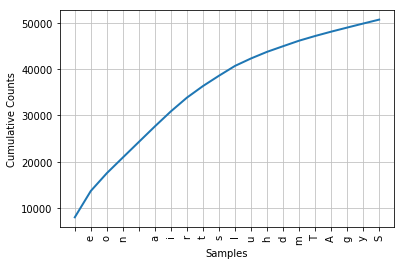

In [25]:
# The plot() method of the FreqDist class plots the distribution of the most frequent characters
fig=fdist1.plot(20,cumulative=True)

In [28]:
#Q1 and Q2.Yes,there are strange characters in this corpus for example "\n" using fdist1 we noticed that "\n" is the very frequent strange character

#Q3. 
the top 20 characters cover 50000/65633 = 0.761 of all character occurrences in this corpus


#Q4. Based on this sample we noticed that there is some title that are not english but not so many

In [124]:
title_corpus[0:100]

['Lonesome Road (1995 Digital Remaster)',
 'Night Terrors (Album Version)',
 'Do Your Will (Album Version)',
 'When You See Me',
 'I Walked Today Where Jesus Walked',
 'Amazing Grace (Album Version)',
 'Cruz',
 'Son Of A Bitch',
 "I Don't Want To Talk About It",
 'Real Love',
 'On Misty Pathways',
 'Another Djemba Djemba',
 'Nightly Cares',
 'Going Down',
 'Your Heart Can Sing',
 'Together We Stand (Album Version)',
 "You'll Never Know",
 'Twelve Ounce (Album Version)',
 'Ayer',
 'Werewolf_ Semen And Blood',
 'Hot Spot (Terrible Love Mix)',
 'A Martyr For My Love For You',
 'Jesus Loves Me (Now More Than Ever)',
 'Lusco',
 'Dream State',
 'Lovely Day',
 'Dig Up Her Bones',
 'Profecias',
 'Baila Baila \x13 Vent Remix',
 'Spaced Invader (Ian Pooley Club Mix)',
 "Mornin' Glory",
 'Same Old Thing',
 'Decidete',
 'Did You Ever Go Steady',
 'So Ist Das Nun Mal',
 'Coming Undone',
 'The Letters',
 'Eu E Meu Coracao',
 'Cendrier',
 'My Lord',
 'You (Demo)',
 'Girls All Pause',
 'Henrys Death',

*****

### 1) Text cleaning

We are now going to apply the following sequence of text cleaning operations to **every** document in the corpus. 

- a) remove non-word useless characters (if there are any)
- b) convert to lowercase
- c) tokenize (convert sequence of characters to sequence of words)
- d) remove stop words
- e) remove useless words (too short or too long words)
- f) stemming

We will do most of these tasks using functions from the ``NLTK`` library.

### a)b)c) Remove useless characters & convert to lowercase & tokenize

**QUESTIONS**

Execute the cells in this section then answer the following questions:

1. What does the instance of RegexpTokenizer class do; which characters does it keep?
2. Modify the value of `tokenization_regexp` so that it only keeps a-z characters then re-execute the cells in this section.
3. What is the smallest and largest number of words in a song title?
4. How many song titles contain the word 'love'?

In [29]:
from nltk.tokenize import RegexpTokenizer

In [40]:
# create an instance of the RegexpTokenizer class

tokenization_regexp = '[^_\W]+'
tokenizer = RegexpTokenizer(tokenization_regexp)

#Q1.RegexpTokenizer splits a string using a regular expression.It remove non-words caracters 

In [31]:
# tokenize an example document by calling the tokenizer() method of this class
tokenizer.tokenize("It's still early - it is just 3 o'clock now!! :) (_) ")

['It', 's', 'still', 'early', 'it', 'is', 'just', '3', 'o', 'clock', 'now']

In [61]:
#Q2.
tokenization_regexp = '[a-zA-Z]+'
tokenizer1 = RegexpTokenizer(tokenization_regexp)

In [62]:
tokenizer1.tokenize("It's still early - it is just 3 o'clock now!! :) (_) ")

['It', 's', 'still', 'early', 'it', 'is', 'just', 'o', 'clock', 'now']

In [32]:
# apply tokenizer to each document (song title) in our corpus
title_corpus_words = [tokenizer.tokenize(doc.lower()) for doc in title_corpus]
type(title_corpus_words),len(title_corpus_words)

(list, 3371)

In [33]:
# the first 5 documents in the tokenized corpus
title_corpus_words[0:5]

[['lonesome', 'road', '1995', 'digital', 'remaster'],
 ['night', 'terrors', 'album', 'version'],
 ['do', 'your', 'will', 'album', 'version'],
 ['when', 'you', 'see', 'me'],
 ['i', 'walked', 'today', 'where', 'jesus', 'walked']]

We will now visualize distribution of number of words per song title. This is just to verify the results of tokenization ...

In [34]:
# create list containing the number of words in each document
df = pd.Series([len(doc) for doc in title_corpus_words])

In [65]:
df.head()

0    5
1    4
2    5
3    4
4    6
dtype: int64

In [35]:
df.describe()

count    3371.000000
mean        3.460694
std         2.120099
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        26.000000
dtype: float64

In [67]:
#Q3
df.value_counts()

3     750
2     734
4     543
1     520
5     349
6     201
7     119
8      68
9      35
11     17
10     17
13      9
12      4
14      3
23      1
26      1
dtype: int64

the number of smallest words is 520 and the largest is 1

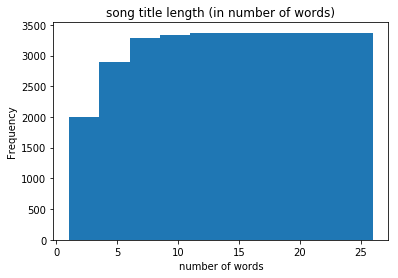

In [36]:
# Cumulative frequency distribution of number of words in each song title

df.plot.hist(title='song title length (in number of words)', cumulative=True)
fig=plt.xlabel('number of words')

In [37]:
# Display song titles that contain only one word

L = [doc[0] for doc in title_corpus_words if len(doc)==1]
print(len(L))
print(L[0:20])

520
['cruz', 'ayer', 'lusco', 'profecias', 'decidete', 'cendrier', 'fleetwood', 'shame', 'cicada', 'carovana', 'humppa', 'losers', 'loveless', 'nadine', 'hypergasm', 'rocket', 'expeditions', 'unbreakable', 'outside', 'marbles']


In [38]:
# Display documents that contain more than 20 words

L = [' '.join(doc) for doc in title_corpus_words if len(doc)>=20]
print(len(L))
L

2


['rock and roll could never hip hop like this part 2 featuring lord finesse mike shonoda chester bennington rahzel qbert grand wizard theodore jazzy jay instrumental',
 'nocturne for piano no 8 in d flat major op 84 no 8 also in huit pia ces bra ves op 84 8']

In [74]:
#Q4.
L = [ doc for doc in title_corpus_words if "love" in doc]
print("The number of song titles contain the word love",len(L))

The number of song titles contain the word love 101


### d) Remove stopwords
We will use NLTK's default list of stop worsd for the English language.

In [75]:
# Load list of stopwords from NLTK library
from nltk.corpus import stopwords

In [76]:
# You might need to download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [77]:
# Load stop words
stop_words_en = stopwords.words('english')

In [78]:
print(type(stop_words_en))
print(len(stop_words_en))

<class 'list'>
179


In [79]:
# Show the first 10 stop words
stop_words_en[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [80]:
# Remove stop words from our corpus
title_corpus_words_2 = [[word for word in doc  if word not in stop_words_en] for doc in title_corpus_words]
type(title_corpus_words_2),len(title_corpus_words_2)

(list, 3371)

### e) remove useless words based on word length

- Very short words are usually not very meaningful.
- Very long words might be either spelling mistakes, or elongated words.

**QUESTIONS**

1. remove all words that contain <= 2 characters or more than 12 characters from all titles in `title_corpus_words_2`. Put the result in a new list called `title_corpus_words_3`.

In [81]:
# create set of all distinct words in corpus
distinct_words_set = {word for doc in title_corpus_words_2 for word in doc}
type(distinct_words_set),len(distinct_words_set)

(set, 3848)

In [82]:
words_len_df = pd.Series([len(word) for word in distinct_words_set], index=list(distinct_words_set))

In [83]:
# Summary statistics of word length
words_len_df.describe()

count    3848.000000
mean        5.915021
std         2.212708
min         1.000000
25%         4.000000
50%         6.000000
75%         7.000000
max        16.000000
dtype: float64

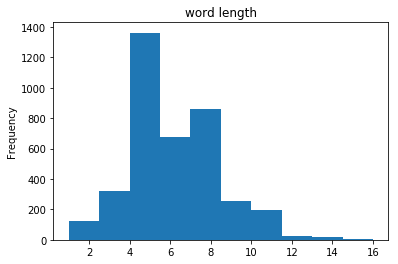

In [84]:
# Histogram of word length
fig = words_len_df.plot.hist(title="word length")

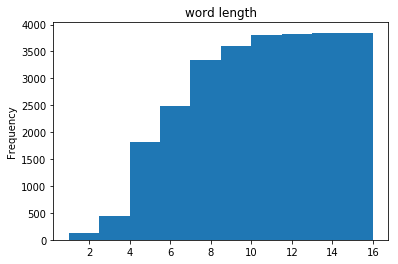

In [85]:
fig = words_len_df.plot.hist(title="word length", cumulative=True)

In [86]:
# how many words have length <= 2
words_len_df[words_len_df<=2].count()

125

In [87]:
# which words have length <= 2
print(sorted(words_len_df[words_len_df<=2].index.tolist()))

['00', '05', '09', '1', '11', '12', '13', '14', '15', '17', '18', '2', '20', '25', '27', '3', '4', '5', '6', '69', '7', '8', '84', '9', '91', '97', '98', 'a4', 'ai', 'al', 'ar', 'ay', 'b', 'bi', 'bo', 'bt', 'c', 'ca', 'cd', 'co', 'da', 'db', 'de', 'di', 'dj', 'dr', 'du', 'e', 'eh', 'el', 'em', 'en', 'ep', 'es', 'et', 'eu', 'ex', 'ez', 'fa', 'ft', 'g', 'go', 'ha', 'ii', 'il', 'io', 'iv', 'j', 'ja', 'je', 'l', 'la', 'le', 'li', 'lo', 'lp', 'lu', 'm2', 'mi', 'mo', 'mr', 'n', 'na', 'ne', 'ng', 'ni', 'ny', 'oh', 'ok', 'op', 'p', 'pa', 'pm', 'pr', 'pt', 'q', 'q1', 'qu', 'r', 'se', 'si', 'st', 'ta', 'te', 'ti', 'tn', 'tu', 'u', 'uh', 'uk', 'um', 'un', 'ur', 'us', 'v', 'va', 'vi', 'w', 'wa', 'wc', 'x', 'ya', 'ye', 'yo', 'z']


In [88]:
# how many words contain more than 15 characters
words_len_df[words_len_df>=15].count()

4

In [89]:
print(sorted(words_len_df[words_len_df>=15].index.tolist()))

['blarneyformasian', 'konjunkturpaket', 'nuoruusmuistoja', 'unconditionally']


In [99]:
title_corpus_words_3 = [[word for word in doc  if word not in stop_words_en and len(word)>2 and len(word)<15] for doc in title_corpus_words]

In [108]:
# verify type and length

assert type(title_corpus_words_3)==list and len(title_corpus_words_3)==len(title_corpus_words_2) and type(title_corpus_words_3[0])==list

### f) Stemming
- All stemming methods are heuristic; there is no perfect stemming method; they all make mistakes.
- We will try the famous Porter method from the `NLTK` library.

#### QUESTIONS

Execute the cells below then answer the following questions:

1. This stemming method reduces/shrinks the vocabulary by how much (fraction)?
2. Give 3 example errors of this stemming method; where an error is when two unrelated words are mapped to the same stem word.
3. Do you think there are too many stemming erros and we should just NOT use stemming? Explain.
4. Can you suggest a simple way (based on simple string operations) to reduce the amount of errors of this stemming method?

In [103]:
from nltk.stem import PorterStemmer

In [104]:
# create instance of class
stemmer = PorterStemmer()

In [105]:
title_corpus_words_4 = [[stemmer.stem(word) for word in doc] for doc in title_corpus_words_3]
type(title_corpus_words_4),len(title_corpus_words_4)

(list, 3371)

In [106]:
title_corpus_words_4[0:5]

[['lonesom', 'road', '1995', 'digit', 'remast'],
 ['night', 'terror', 'album', 'version'],
 ['album', 'version'],
 ['see'],
 ['walk', 'today', 'jesu', 'walk']]

Analyze the results of stemming method

In [109]:
# Number of distinct words BEFORE stemming
len({word for doc in title_corpus_words_3 for word in doc})

3719

In [110]:
# Number of distinct words AFTER stemming
len({word for doc in title_corpus_words_4 for word in doc})

3401

#Q1.
stemming method reduces the vocabulary with 3401/3719=0.91

In [111]:
# Create dictionnary containing each word and its corresponding stemmed word
distinct_words = {word for doc in title_corpus_words_3 for word in doc} # set of distinct words in corpus BEFORE stemming
from collections import defaultdict
d1 = defaultdict(list)
for w in distinct_words:
    d1[stemmer.stem(w)].append(w)
len(d1)

3401

In [112]:
# key = stemmed word, value = list of all words mapped to this stemmed word
d1

defaultdict(list,
            {'calcul': ['calculator'],
             'drive': ['driving', 'drive', 'drives'],
             'kick': ['kick', 'kicking'],
             'drunken': ['drunken'],
             'cruz': ['cruz'],
             'carp': ['carpe'],
             '1492': ['1492'],
             'bloodi': ['bloody'],
             'fang': ['fang'],
             'cliff': ['cliff'],
             'simon': ['simon'],
             'breakin': ['breakin'],
             'compromis': ['compromise'],
             'geniu': ['genius'],
             'unchain': ['unchain'],
             'along': ['along'],
             'gimm': ['gimme'],
             'soorma': ['soorma'],
             'exist': ['existing', 'existe'],
             'zapando': ['zapando'],
             'tit': ['tit'],
             'placid': ['placid'],
             'sweat': ['sweat'],
             'cancion': ['cancion'],
             'dessert': ['dessert'],
             'spider': ['spider'],
             'libert': ['liberte'],
         

In [113]:
# Display words which are mapped to the SAME word
for k,v in d1.items():
    if len(v)>1:
        print(k,v)

drive ['driving', 'drive', 'drives']
kick ['kick', 'kicking']
exist ['existing', 'existe']
lake ['lake', 'lakes']
say ['say', 'says']
watch ['watch', 'watching']
atom ['atomic', 'atom']
laugh ['laughing', 'laugh', 'laughed']
lover ['lovers', 'lover']
haunt ['haunt', 'haunting', 'haunted']
throne ['thrones', 'throne']
wood ['woods', 'wood']
blue ['blue', 'blues']
altern ['alternate', 'alternative']
night ['night', 'nights']
bomb ['bombs', 'bomb']
suicid ['suicidal', 'suicide']
song ['song', 'songs']
cow ['cow', 'cows']
nacht ['nachts', 'nacht']
burn ['burning', 'burn']
emerg ['emerge', 'emergency']
war ['war', 'wars']
session ['sessions', 'session']
troubl ['troubles', 'trouble']
name ['name', 'naming']
sens ['senses', 'sense']
shade ['shade', 'shades']
care ['care', 'cares', 'careful']
boy ['boy', 'boys']
wash ['washes', 'wash', 'washed']
cri ['cry', 'cried']
wit ['witness', 'wit']
weapon ['weapon', 'weapons']
lie ['lie', 'lies', 'lied']
chain ['chains', 'chain']
reason ['reasons', 're

#Q2

    coated and coat

    original and origins

    amy and amie

#Q3. No there are not many errors 

*****

#### Prepare clean corpus for BOW in Scikit-learn
The BOW module in ``Scikit-Learn`` library requires the input documents as a list of strings, and not as a list of words. Therefore we are going to concatenate the words in our cleaned tokenized corpus ..

In [116]:
# concatenate the words in the cleaned corpus
title_corpus_clean = [' '.join(doc) for doc in title_corpus_words_4]
len(title_corpus_clean)

3371

In [117]:
title_corpus[0:5]

['Lonesome Road (1995 Digital Remaster)',
 'Night Terrors (Album Version)',
 'Do Your Will (Album Version)',
 'When You See Me',
 'I Walked Today Where Jesus Walked']

In [118]:
title_corpus_clean[0:5]

['lonesom road 1995 digit remast',
 'night terror album version',
 'album version',
 'see',
 'walk today jesu walk']

*****

### 2) Vector representation using boolean BOW

**QUESTIONS**

1. Create an instance of the `CounVectorizer` class, with min_df=3 and max_df=0.9. Put this instance in a variable called `title_vec`. Make sure it corresponds to **boolean** bag-of-words.
2. Fit this instance on the text documents in `title_corpus_clean`. How many words are there in the vocabulary?
3. Create the document-term matrix for `title_corpus_clean`, and put the result in a variable called `title_dtm`. What is the size of this matrix? 
4. What are the minimum and maximum values of this matrix?  Does this make sense?
5. How many rows of this matrix contain all zeros? How many rows contain only one non-zero value?  Hint: call the sum() method with argument axis=1, then convert the result to an array ...
6. Calculate the cosine similarity between all pairs of rows in `title_dtm` by calling the `cosine_similarity` function from the `sklearn.metrics.pairwise` module (this function has already been imported for you above).
7. Print all pairs of song titles that have cosine similarity above 0.9.

In [120]:
#Q.1
title_vec= CountVectorizer(max_df=0.9, min_df=3, stop_words='english', binary = True)


In [130]:
#Q2.
title_vec.fit(title_corpus_clean)
vocab1 = title_vec.get_feature_names()
print("there are",len(vocab1),"words")

there are 493 words


In [131]:
#Q3.
title_dtm=title_vec.transform(title_corpus_clean)
title_dtm.shape


(3371, 493)

In [129]:
#Q4.
title_dtm.min(),title_dtm.max()

(0, 1)

Yes it make sense because we use binary bag of words

In [132]:
#Q5.
title_dtm.nnz

3960

In [138]:
idx=title_dtm.sum(axis=1)==1

In [140]:
k=0
for i in idx :
    if i :
        k=k+1
    else:
        pass
print("number of rows that contains onlynon-zero value", k)

1107


In [149]:
#Q6.
l=cosine_similarity(title_dtm,dense_output=False)

In [169]:
type(l)

scipy.sparse.csr.csr_matrix

In [177]:
#Q7.
for i in range (l.shape[0]):
    for j in range (l.shape[1]):
        if l[i,j]>0.9 :
            print (title_dtm[i:j])
            print('\n')







  (0, 10)	1
  (0, 301)	1
  (0, 464)	1
  (1, 10)	1
  (1, 464)	1
  (3, 223)	1
  (3, 441)	1
  (3, 468)	1
  (4, 10)	1
  (4, 168)	1
  (4, 464)	1
  (6, 401)	1
  (7, 430)	1
  (7, 470)	1
  (8, 264)	1
  (8, 338)	1
  (10, 22)	1
  (11, 65)	1
  (13, 185)	1
  (13, 388)	1
  (14, 10)	1
  (14, 409)	1
  (14, 442)	1
  (14, 464)	1
  (15, 235)	1
  :	:
  (785, 299)	1
  (785, 312)	1
  (785, 402)	1
  (785, 464)	1
  (786, 335)	1
  (790, 182)	1
  (790, 207)	1
  (791, 301)	1
  (791, 379)	1
  (792, 355)	1
  (793, 463)	1
  (793, 464)	1
  (794, 10)	1
  (796, 65)	1
  (797, 10)	1
  (797, 270)	1
  (797, 464)	1
  (798, 185)	1
  (798, 199)	1
  (800, 239)	1
  (800, 294)	1
  (800, 301)	1
  (800, 347)	1
  (800, 377)	1
  (801, 97)	1





  (0, 10)	1
  (0, 464)	1
  (2, 223)	1
  (2, 441)	1
  (2, 468)	1
  (3, 10)	1
  (3, 168)	1
  (3, 464)	1
  (5, 401)	1
  (6, 430)	1
  (6, 470)	1
  (7, 264)	1
  (7, 338)	1
  (9, 22)	1
  (10, 65)	1
  (12, 185)	1
  (12, 388)	1
  (13, 10)	1
  (13, 409)	1
  (13, 442)	1
  (13, 464)	1
  (14, 23

  (0, 10)	1
  (0, 464)	1
  (2, 223)	1
  (2, 441)	1
  (2, 468)	1
  (3, 10)	1
  (3, 168)	1
  (3, 464)	1
  (5, 401)	1
  (6, 430)	1
  (6, 470)	1
  (7, 264)	1
  (7, 338)	1
  (9, 22)	1
  (10, 65)	1
  (12, 185)	1
  (12, 388)	1
  (13, 10)	1
  (13, 409)	1
  (13, 442)	1
  (13, 464)	1
  (14, 235)	1
  (15, 10)	1
  (15, 464)	1
  (17, 46)	1
  :	:
  (1468, 10)	1
  (1468, 154)	1
  (1468, 301)	1
  (1468, 464)	1
  (1470, 237)	1
  (1471, 94)	1
  (1471, 488)	1
  (1472, 253)	1
  (1472, 326)	1
  (1472, 371)	1
  (1473, 261)	1
  (1473, 474)	1
  (1474, 372)	1
  (1476, 20)	1
  (1476, 376)	1
  (1477, 10)	1
  (1477, 119)	1
  (1477, 404)	1
  (1477, 464)	1
  (1478, 74)	1
  (1478, 277)	1
  (1480, 209)	1
  (1480, 301)	1
  (1480, 346)	1
  (1480, 412)	1


  (0, 10)	1
  (0, 464)	1
  (2, 223)	1
  (2, 441)	1
  (2, 468)	1
  (3, 10)	1
  (3, 168)	1
  (3, 464)	1
  (5, 401)	1
  (6, 430)	1
  (6, 470)	1
  (7, 264)	1
  (7, 338)	1
  (9, 22)	1
  (10, 65)	1
  (12, 185)	1
  (12, 388)	1
  (13, 10)	1
  (13, 409)	1
  (13, 442)	1
  (13, 

  (0, 10)	1
  (0, 464)	1
  (2, 223)	1
  (2, 441)	1
  (2, 468)	1
  (3, 10)	1
  (3, 168)	1
  (3, 464)	1
  (5, 401)	1
  (6, 430)	1
  (6, 470)	1
  (7, 264)	1
  (7, 338)	1
  (9, 22)	1
  (10, 65)	1
  (12, 185)	1
  (12, 388)	1
  (13, 10)	1
  (13, 409)	1
  (13, 442)	1
  (13, 464)	1
  (14, 235)	1
  (15, 10)	1
  (15, 464)	1
  (17, 46)	1
  :	:
  (3348, 253)	1
  (3348, 437)	1
  (3349, 123)	1
  (3350, 10)	1
  (3350, 233)	1
  (3350, 464)	1
  (3351, 103)	1
  (3351, 413)	1
  (3353, 458)	1
  (3353, 487)	1
  (3354, 10)	1
  (3354, 464)	1
  (3354, 487)	1
  (3355, 233)	1
  (3355, 352)	1
  (3356, 432)	1
  (3357, 402)	1
  (3358, 2)	1
  (3358, 28)	1
  (3358, 105)	1
  (3358, 344)	1
  (3360, 141)	1
  (3362, 91)	1
  (3363, 140)	1
  (3363, 429)	1








  (0, 10)	1
  (0, 168)	1
  (0, 464)	1
  (2, 401)	1
  (3, 430)	1
  (3, 470)	1
  (4, 264)	1
  (4, 338)	1
  (6, 22)	1
  (7, 65)	1
  (9, 185)	1
  (9, 388)	1
  (10, 10)	1
  (10, 409)	1
  (10, 442)	1
  (10, 464)	1
  (11, 235)	1
  (12, 10)	1
  (12, 464)	1
  (14, 46)	1
 

IndexError: index out of bounds: 0 <= 17 <= 3371, 0 <= 2 <= 3371, 17 <= 2

*****

## Optional Bonus Questions

Answer the question that seems easier to you.

### Question 1

1. Cluster the song titles using the feature vectors in `title_dtm`. You are free to use any clustering method (for example kmeans in sklearn ...). Also, you will need to select an appropriate number of clusters.
2. Print the song titles in the largest cluster.

### Question 2

Copy this file into a new .ipynb file and then repeat all the work for the `terms` column instead of the `title` column.

In [154]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(title_dtm)